In [2]:
import matplotlib.pyplot as plt

from ocr import catalog

In [3]:
usfs = catalog.get_dataset('USFS-wildfire-risk-communities-4326').to_xarray()
usfs

<xarray.Dataset> Size: 652GB
Dimensions:      (latitude: 97579, longitude: 208881)
Coordinates:
  * latitude     (latitude) float64 781kB 52.48 52.48 52.48 ... 22.43 22.43
  * longitude    (longitude) float64 2MB -128.4 -128.4 -128.4 ... -64.05 -64.05
Data variables:
    CFL          (latitude, longitude) float32 82GB dask.array<chunksize=(6000, 4500), meta=np.ndarray>
    FLEP8        (latitude, longitude) float32 82GB dask.array<chunksize=(6000, 4500), meta=np.ndarray>
    Exposure     (latitude, longitude) float32 82GB dask.array<chunksize=(6000, 4500), meta=np.ndarray>
    BP           (latitude, longitude) float32 82GB dask.array<chunksize=(6000, 4500), meta=np.ndarray>
    WHP          (latitude, longitude) float32 82GB dask.array<chunksize=(6000, 4500), meta=np.ndarray>
    FLEP4        (latitude, longitude) float32 82GB dask.array<chunksize=(6000, 4500), meta=np.ndarray>
    RPS          (latitude, longitude) float32 82GB dask.array<chunksize=(6000, 4500), meta=np.ndarray>
    CRPS         (latitude, longitude) float32 82GB dask.array<chunksize=(6000, 4500), meta=np.ndarray>
    spatial_ref  int32 4B ...
Attributes:
    title:        RDS-2020-0016-02
    version:      2024-V2
    data_source:  https://www.fs.usda.gov/rds/archive/catalog/RDS-2020-0016-
    description:  ['Modified version of: Wildfire Risk to Communities: Spatia...
    EPSG:         4326
    resolution:   30m

In [4]:
lat = 47.35914
lng = -120.16034

subset = usfs.BP.sel(latitude=slice(lat + 0.5, lat - 0.5), longitude=slice(lng - 0.5, lng + 0.5))
subset

<xarray.DataArray 'BP' (latitude: 3247, longitude: 3247)> Size: 42MB
dask.array<getitem, shape=(3247, 3247), dtype=float32, chunksize=(2991, 1911), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 26kB 47.86 47.86 47.86 ... 46.86 46.86 46.86
  * longitude  (longitude) float64 26kB -120.7 -120.7 -120.7 ... -119.7 -119.7
Attributes:
    AREA_OR_POINT:  Area
    grid_mapping:   spatial_ref

/var/folders/x0/v8j9bc4962dbwg_w3gytvf080000gn/T/ipykernel_36797/2103894690.py:6: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


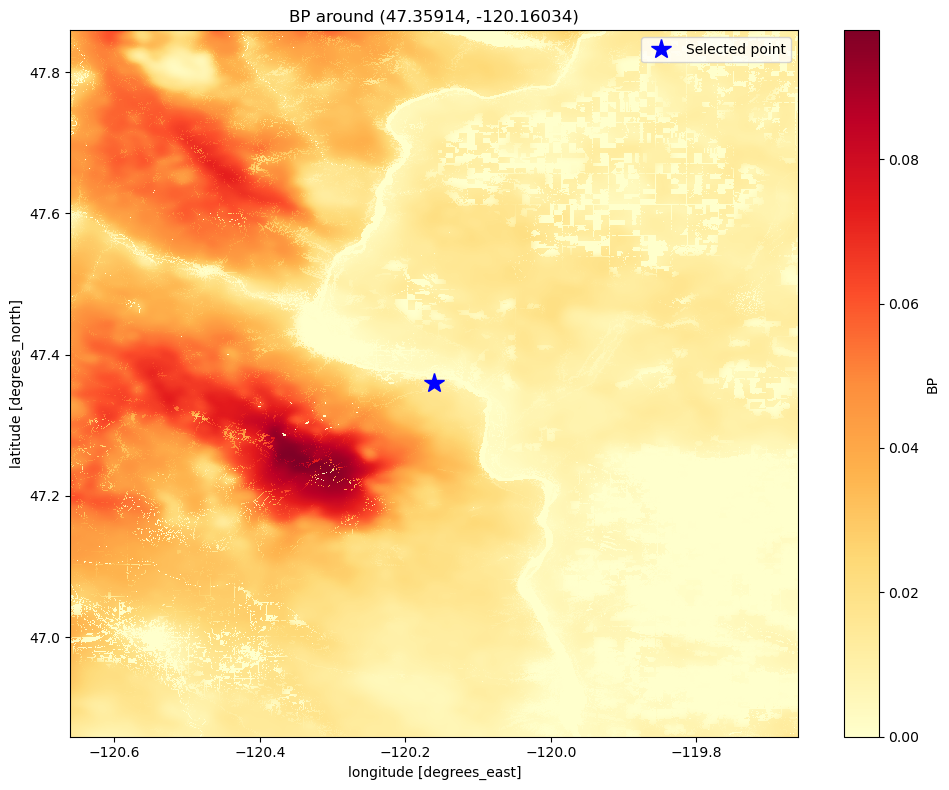

In [5]:
fig, ax = plt.subplots(figsize=(10, 8))
subset.plot(ax=ax, cmap='YlOrRd')
ax.plot(lng, lat, 'b*', markersize=15, label='Selected point')
ax.set_title(f'BP around ({lat}, {lng})')
ax.legend()
plt.tight_layout()
plt.show()

In [7]:
usfs_270 = catalog.get_dataset('USFS-wildfire-risk-communities').to_xarray()
usfs_270

<xarray.Dataset> Size: 1TB
Dimensions:      (y: 101538, x: 156335)
Coordinates:
  * x            (x) float64 1MB -2.362e+06 -2.362e+06 ... 2.328e+06 2.328e+06
  * y            (y) float64 812kB 3.267e+06 3.267e+06 ... 2.213e+05 2.213e+05
Data variables:
    BP           (y, x) float64 127GB dask.array<chunksize=(6000, 4500), meta=np.ndarray>
    CRPS         (y, x) float64 127GB dask.array<chunksize=(6000, 4500), meta=np.ndarray>
    FLEP8        (y, x) float64 127GB dask.array<chunksize=(6000, 4500), meta=np.ndarray>
    CFL          (y, x) float64 127GB dask.array<chunksize=(6000, 4500), meta=np.ndarray>
    Exposure     (y, x) float64 127GB dask.array<chunksize=(6000, 4500), meta=np.ndarray>
    spatial_ref  int64 8B ...
    WHP          (y, x) float64 127GB dask.array<chunksize=(6000, 4500), meta=np.ndarray>
    FLEP4        (y, x) float64 127GB dask.array<chunksize=(6000, 4500), meta=np.ndarray>
    RPS          (y, x) float64 127GB dask.array<chunksize=(6000, 4500), meta=np.ndarray>

In [11]:
usfs_270.spatial_ref.crs_wkt

'PROJCS["NAD83 / Conus Albers",GEOGCS["NAD83",DATUM["North_American_Datum_1983",SPHEROID["GRS 1980",6378137,298.257222101004,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6269"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4269"]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",23],PARAMETER["longitude_of_center",-96],PARAMETER["standard_parallel_1",29.5],PARAMETER["standard_parallel_2",45.5],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","5070"]]'

/var/folders/x0/v8j9bc4962dbwg_w3gytvf080000gn/T/ipykernel_36797/3861440779.py:12: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


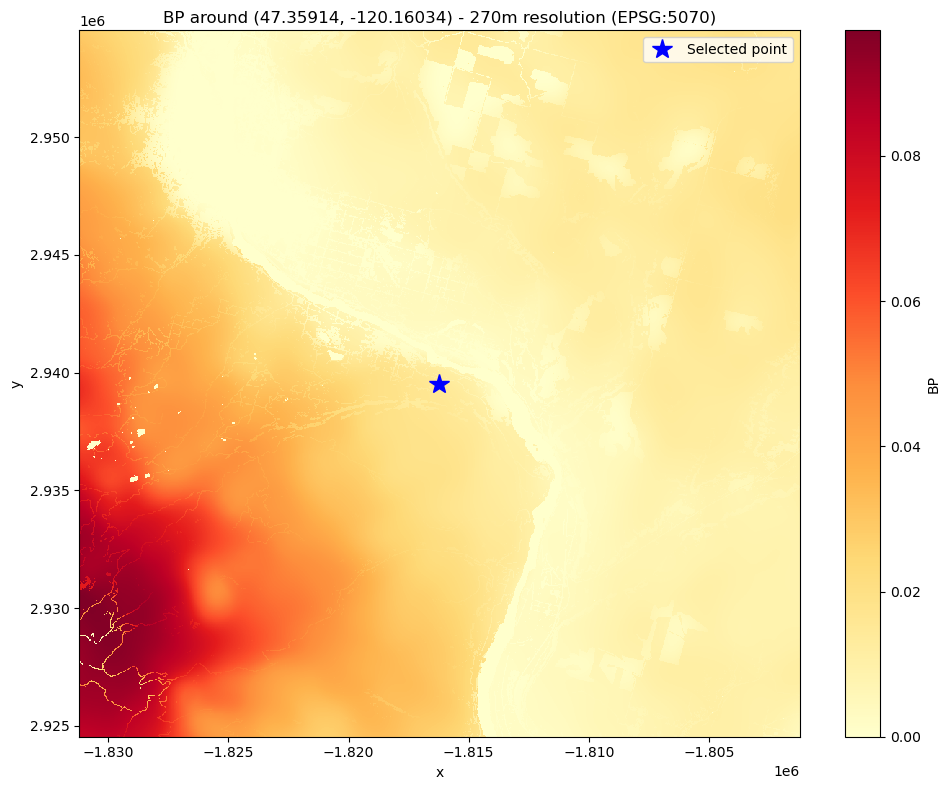

In [16]:
import pyproj

transformer = pyproj.Transformer.from_crs('EPSG:4326', usfs_270.spatial_ref.crs_wkt, always_xy=True)
x, y = transformer.transform(lng, lat)

subset_270 = usfs_270.BP.sel(x=slice(x - 15000, x + 15000), y=slice(y + 15000, y - 15000))
fig, ax = plt.subplots(figsize=(10, 8))
subset_270.plot(ax=ax, cmap='YlOrRd')
ax.plot(x, y, 'b*', markersize=15, label='Selected point')
ax.set_title(f'BP around ({lat}, {lng}) - 270m resolution (EPSG:5070)')
ax.legend()
plt.tight_layout()
plt.show()